# Buat Choropleth

## Import Lib

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from matplotlib.font_manager import FontProperties
from drawarrow import fig_arrow
from pyfonts import load_font
from highlight_text import fig_text, ax_text

## Import Map

In [26]:
# import geojson file
gdf = gpd.read_file("map-data/toraja-kec.geojson")
print(gdf.head())

   kode_kec kode_kk kode_prov         kecamatan     kab_kota  \
0  73.18.20   73.18        73            Rembon  Tana Toraja   
1  73.18.27   73.18        73      Makale Utara  Tana Toraja   
2  73.18.28   73.18        73            Mappak  Tana Toraja   
3  73.18.29   73.18        73    Makale Selatan  Tana Toraja   
4  73.18.33   73.18        73  Sangalla Selatan  Tana Toraja   

           provinsi       fid                        nama  \
0  Sulawesi Selatan  73.18.20            Kecamatan Rembon   
1  Sulawesi Selatan  73.18.27      Kecamatan Makale Utara   
2  Sulawesi Selatan  73.18.28            Kecamatan Mappak   
3  Sulawesi Selatan  73.18.29    Kecamatan Makale Selatan   
4  Sulawesi Selatan  73.18.33  Kecamatan Sangalla Selatan   

                                               label  \
0  Kecamatan Rembon, Kabupaten Tana Toraja, Provi...   
1  Kecamatan Makale Utara, Kabupaten Tana Toraja,...   
2  Kecamatan Mappak, Kabupaten Tana Toraja, Provi...   
3  Kecamatan Makale Sela

## Import Data and Merge

In [27]:
data = pd.read_excel("value-data/toraja-kec.xlsx")
print(data.head())

   kode_kec       kecamatan      value
0  73.18.01        Saluputi  92.494269
1  73.18.02        Bittuang  91.255219
2  73.18.03  Bonggakaradeng   3.914920
3  73.18.05          Makale  16.059286
4  73.18.09        Simbuang  65.626548


In [28]:
# inner join on kode_kec
gdf = gdf.merge(data, left_on="kode_kec", right_on="kode_kec")
print(gdf.head())

   kode_kec kode_kk kode_prov       kecamatan_x     kab_kota  \
0  73.18.20   73.18        73            Rembon  Tana Toraja   
1  73.18.27   73.18        73      Makale Utara  Tana Toraja   
2  73.18.28   73.18        73            Mappak  Tana Toraja   
3  73.18.29   73.18        73    Makale Selatan  Tana Toraja   
4  73.18.33   73.18        73  Sangalla Selatan  Tana Toraja   

           provinsi       fid                        nama  \
0  Sulawesi Selatan  73.18.20            Kecamatan Rembon   
1  Sulawesi Selatan  73.18.27      Kecamatan Makale Utara   
2  Sulawesi Selatan  73.18.28            Kecamatan Mappak   
3  Sulawesi Selatan  73.18.29    Kecamatan Makale Selatan   
4  Sulawesi Selatan  73.18.33  Kecamatan Sangalla Selatan   

                                               label  \
0  Kecamatan Rembon, Kabupaten Tana Toraja, Provi...   
1  Kecamatan Makale Utara, Kabupaten Tana Toraja,...   
2  Kecamatan Mappak, Kabupaten Tana Toraja, Provi...   
3  Kecamatan Makale Sela

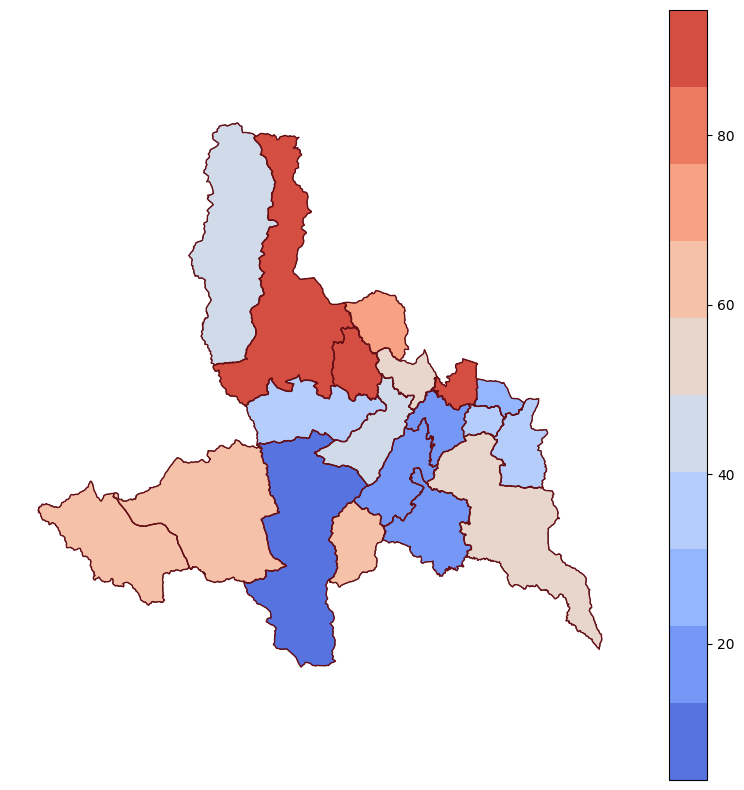

In [29]:
cmap = load_cmap("coolwarm")

ax = gdf.boundary.plot(figsize=(10, 10), edgecolor="#681017", linewidth=1)
gdf.plot(ax=ax, column="value", legend=True, cmap=cmap, edgecolor="black", linewidth=0.5)

ax.set_axis_off()


In [30]:
gdf.to_excel("output/toraja-kec.xlsx", index=False)

In [31]:
gdf['geometry'].to_crs({'init': 'epsg:3395'})\
               .map(lambda p: p.area / 10**6)

c:\Users\hendr\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyproj\crs\crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


0      72.108418
1      24.231796
2     149.531420
3      72.138562
4      57.491676
5      18.988770
6     232.365508
7      55.016300
8      48.600210
9     101.375516
10     44.004750
11     40.792334
12    264.037745
13    269.282538
14    238.493541
15     34.002257
16    224.859425
17     17.970634
18     84.357929
Name: geometry, dtype: float64

In [32]:
print(gdf)

    kode_kec kode_kk kode_prov           kecamatan_x     kab_kota  \
0   73.18.20   73.18        73                Rembon  Tana Toraja   
1   73.18.27   73.18        73          Makale Utara  Tana Toraja   
2   73.18.28   73.18        73                Mappak  Tana Toraja   
3   73.18.29   73.18        73        Makale Selatan  Tana Toraja   
4   73.18.33   73.18        73      Sangalla Selatan  Tana Toraja   
5   73.18.34   73.18        73        Sangalla Utara  Tana Toraja   
6   73.18.31   73.18        73               Masanda  Tana Toraja   
7   73.18.37   73.18        73                  Rano  Tana Toraja   
8   73.18.38   73.18        73                 Kurra  Tana Toraja   
9   73.18.35   73.18        73      Malimbong Balepe  Tana Toraja   
10  73.18.01   73.18        73              Saluputi  Tana Toraja   
11  73.18.05   73.18        73                Makale  Tana Toraja   
12  73.18.02   73.18        73              Bittuang  Tana Toraja   
13  73.18.03   73.18        73    

In [36]:
gdf = gdf.to_crs(epsg=3857)  # Example: Web Mercator (meters) or use a local UTM zone


In [ ]:
gdf["area_sqm"] = gdf.geometry.area  # Area in square meters

